In [1]:
import os
os.chdir(os.getcwd())

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [3]:
df = pd.read_csv('airline_passengers.csv',index_col='Month')
df.head()

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


In [4]:
df.dropna(inplace=True)

<AxesSubplot:xlabel='Month'>

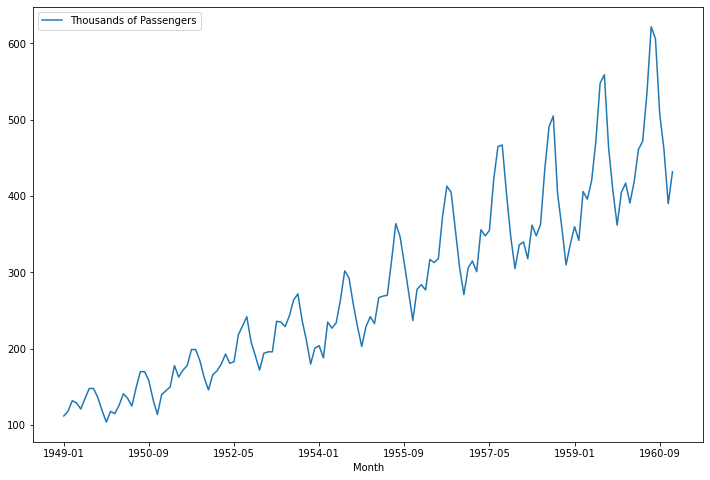

In [5]:
df.plot(figsize=(12,8))

In [6]:
type(df.index)

pandas.core.indexes.base.Index

In [7]:
# change index to datetime type in python first

df.index = pd.to_datetime(df.index)
df.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [8]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [9]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [10]:
# Sampling using resample and mean
sampling_set = df['Thousands of Passengers'].resample('A').mean()  # one sample = average over time ('A' represents year)
sampling_set.head()

Month
1949-12-31    126.666667
1950-12-31    139.666667
1951-12-31    170.166667
1952-12-31    197.000000
1953-12-31    225.000000
Freq: A-DEC, Name: Thousands of Passengers, dtype: float64

In [11]:
# Sampling using asfreq (ffill = forward fill, bfill = backward fill)
freq_set = df['Thousands of Passengers'].asfreq(freq='Q', method='ffill')     # one sample = data selected at end of time
freq_set.head()

Month
1949-03-31    132.0
1949-06-30    135.0
1949-09-30    136.0
1949-12-31    118.0
1950-03-31    141.0
Freq: Q-DEC, Name: Thousands of Passengers, dtype: float64

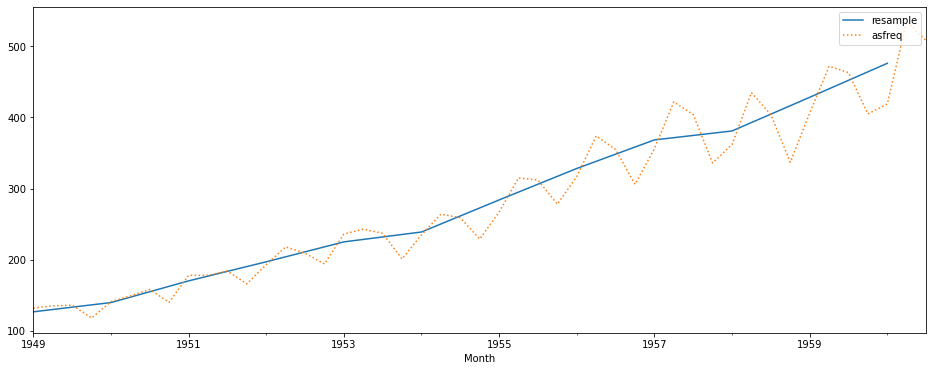

In [12]:
# Plot sample sets
sampling_set.plot(figsize=(16,6))        # one sample = average over month ('M' represents month)
freq_set.plot(style=':')                 # one sample = data selected at end of year
plt.legend(['resample','asfreq'],loc='upper right');

In [13]:
# Shifting
shifted_period = 1
df_shifted = df.shift(periods=shifted_period)
df_shifted.head()

,Thousands of Passengers
Month,
1949-01-01,NaN
1949-02-01,112.0
1949-03-01,118.0
1949-04-01,132.0
1949-05-01,129.0


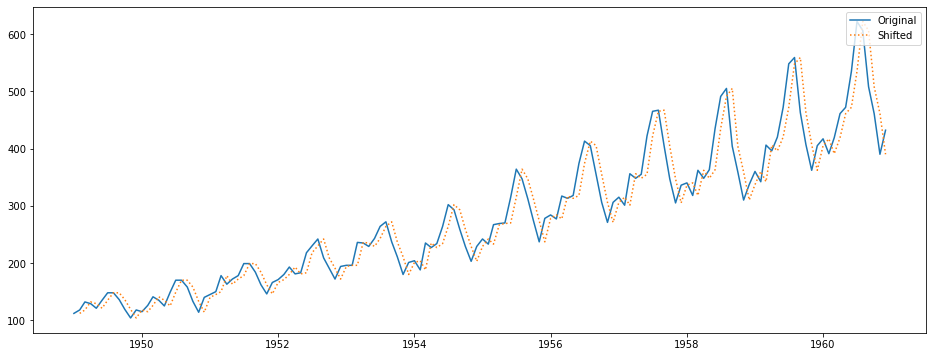

In [14]:
fig = plt.figure(figsize=(16,6)) 
plt.plot(df.index, df['Thousands of Passengers'], df_shifted.index, df_shifted['Thousands of Passengers'], ':')              
plt.legend(['Original','Shifted'],loc='upper right');

## Smoothing: Moving Average

In [15]:
df['6-month-SMA'] = df['Thousands of Passengers'].rolling(window=6).mean()

In [16]:
df['12-month-SMA'] = df['Thousands of Passengers'].rolling(window=12).mean()

In [17]:
df['6-month-SMA-Center'] = df['Thousands of Passengers'].rolling(window=6,center=True).mean()

In [18]:
df.head(15)

,Thousands of Passengers,6-month-SMA,12-month-SMA,6-month-SMA-Center
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,NaN,NaN,NaN
1949-03-01,132.0,NaN,NaN,NaN
1949-04-01,129.0,NaN,NaN,124.500000
1949-05-01,121.0,NaN,NaN,130.500000
1949-06-01,135.0,124.500000,NaN,135.500000
1949-07-01,148.0,130.500000,NaN,136.166667
1949-08-01,148.0,135.500000,NaN,134.500000
1949-09-01,136.0,136.166667,NaN,131.666667


In [19]:
df.tail(15)

,Thousands of Passengers,6-month-SMA,12-month-SMA,6-month-SMA-Center
Month,,,,
1959-10-01,407.0,478.166667,418.333333,457.333333
1959-11-01,362.0,468.500000,422.666667,435.500000
1959-12-01,405.0,457.333333,428.333333,407.500000
1960-01-01,417.0,435.500000,433.083333,400.166667
1960-02-01,391.0,407.500000,437.166667,409.166667
1960-03-01,419.0,400.166667,438.250000,427.500000
1960-04-01,461.0,409.166667,443.666667,449.166667
1960-05-01,472.0,427.500000,448.000000,483.333333
1960-06-01,535.0,449.166667,453.250000,519.166667


<AxesSubplot:xlabel='Month'>

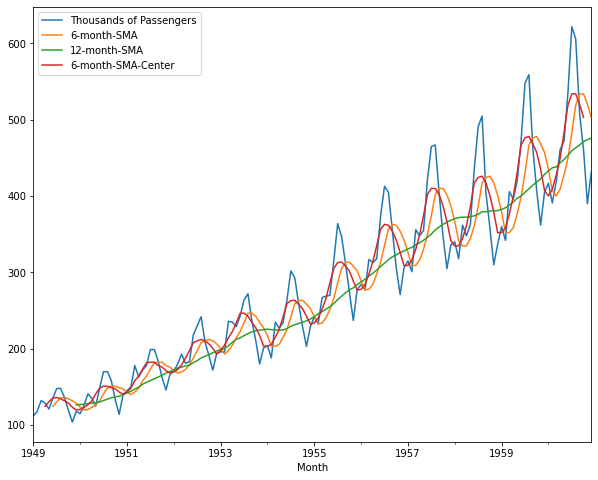

In [20]:
df.plot(figsize=(10,8))

## Smoothing: Exponential Smoothing

In [21]:
df['EWMA-0.3'] = df['Thousands of Passengers'].ewm(alpha=0.3,adjust=False).mean()

In [22]:
df['EWMA-0.6'] = df['Thousands of Passengers'].ewm(alpha=0.6,adjust=False).mean()

<AxesSubplot:xlabel='Month'>

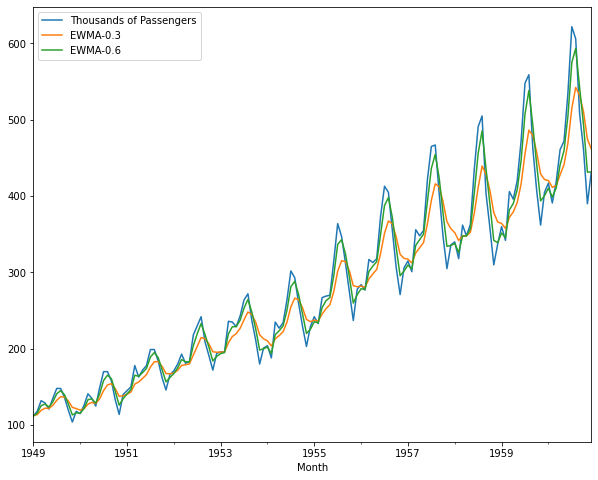

In [23]:
df[['Thousands of Passengers','EWMA-0.3','EWMA-0.6']].plot(figsize=(10,8))

## Decomposition

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

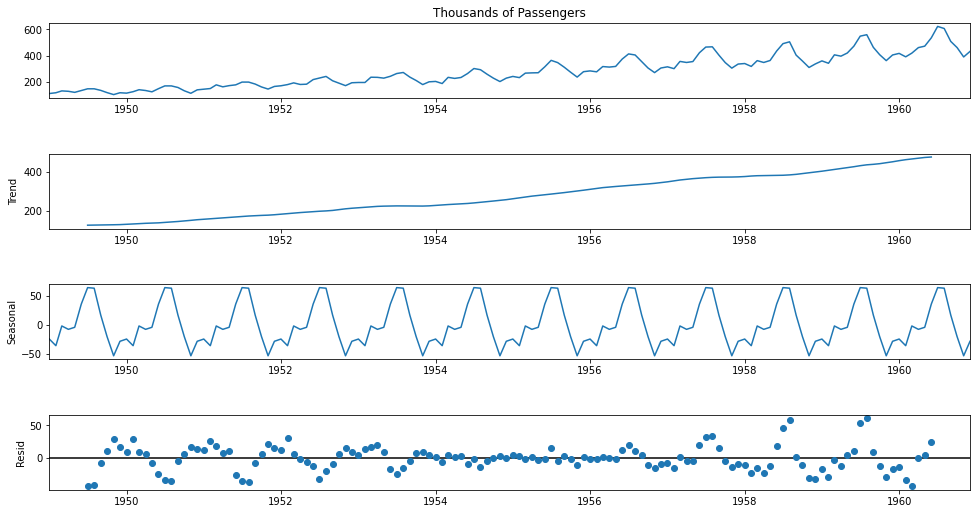

In [25]:
result = seasonal_decompose(df['Thousands of Passengers'])
fig = result.plot()
fig.set_size_inches(15, 8)

<AxesSubplot:xlabel='Month'>

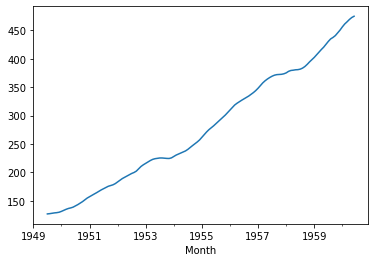

In [26]:
result.trend.plot()

<AxesSubplot:xlabel='Month'>

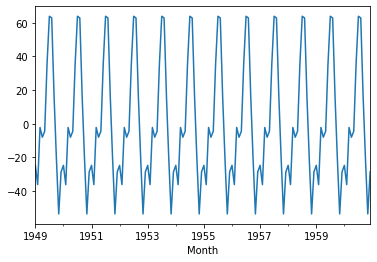

In [27]:
result.seasonal.plot()

<AxesSubplot:xlabel='Month'>

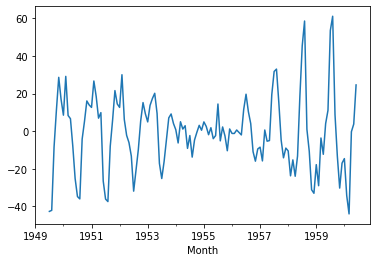

In [28]:
result.resid.plot()